In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_dir = "/home/vivek/Desktop/Vivek/Nitish_Course/Z_ConsolidatedResources/Trading/Module312/NitishCode/Data/"

In [3]:
ticker = "BANKNIFTY.csv"
pd_data = pd.read_csv(data_dir + ticker)

In [4]:
pd_data = pd_data.dropna(how="any")

In [5]:
pd_data.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,32132.777047,32465.072015,32121.027184,32443.472656,253602.946519
1,2020-01-03,32326.573174,32329.424704,31960.028610,32068.876953,217602.531270
2,2020-01-06,31910.078107,31914.078061,31170.188275,31236.787109,256202.979585
3,2020-01-07,31597.683236,31851.078726,31200.537465,31399.035156,294403.424468
4,2020-01-08,30995.139168,31451.483465,30899.191066,31373.285156,304503.544859


In [6]:
list_gbm_y_real = list(pd_data["Close"])
list_gbm_x_real = list(range(len(list_gbm_y_real)))

list_gbm_x = list_gbm_x_real
list_gbm_y = list_gbm_y_real

len(list_gbm_x), len(list_gbm_y)

(865, 865)

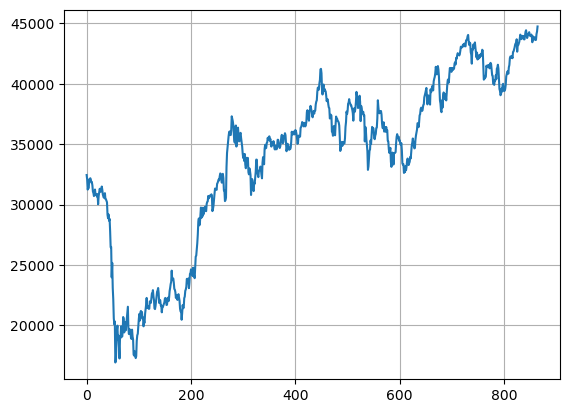

In [7]:
plt.plot(list_gbm_x, list_gbm_y)
plt.grid()

In [8]:
def get_macd_data(data, short_window=20, long_window=50, signal_window=12):
    """
    Get SMA, LMA, MACD, signal_line

    parameters
    -----------------------------
    short_window: short moving average size
    long_window: long moving average size
    signal_window: moving average size for signal line
    Output:
    Data frame with price, SMA, LMA, MACD, signal_line
    SMA: short moving average
    LMA: long moving average
    MACD: SMA - LMA
    signal_line: moving average of MACD
    """
    macd_data = data.copy()
    macd_data['SMA'] = macd_data['price'].rolling(window = short_window, min_periods=2,center=False).mean()
    macd_data['LMA'] = macd_data['price'].rolling(window = long_window, min_periods=2,center=False).mean()
    macd_data["MACD"] = macd_data['SMA'] - macd_data['LMA']
    macd_data['signal_line'] = macd_data['MACD'].rolling(window = signal_window, min_periods=2, center=False).mean()
    return macd_data

In [9]:
PriceSeries1 = list_gbm_y
df_stock = pd.DataFrame()
df_stock["Price"] = PriceSeries1
#df_stock

In [10]:
df_stock['ema5'] = df_stock['Price'].ewm(span=5, adjust=False).mean()
df_stock['ema10'] = df_stock['Price'].ewm(span=10, adjust=False).mean()
df_stock['ema15'] = df_stock['Price'].ewm(span=15, adjust=False).mean()

df_stock['ema25'] = df_stock['Price'].ewm(span=25, adjust=False).mean()
df_stock['ema100'] = df_stock['Price'].ewm(span=100, adjust=False).mean()

df_stock['ema150'] = df_stock['Price'].ewm(span=150, adjust=False).mean()
df_stock['ema250'] = df_stock['Price'].ewm(span=250, adjust=False).mean()

df_stock['diff5_10'] = df_stock['ema5'] - df_stock['ema10']
df_stock['signal5_10'] = df_stock['diff5_10'].ewm(span=9, adjust=False).mean()

df_stock['diff5_15'] = df_stock['ema5'] - df_stock['ema15']
df_stock['signal5_15'] = df_stock['diff5_15'].ewm(span=9, adjust=False).mean()


df_stock['diff5_25'] = df_stock['ema5'] - df_stock['ema25']
df_stock['signal5_25'] = df_stock['diff5_25'].ewm(span=9, adjust=False).mean()

df_stock['diff25_100'] = df_stock['ema25'] - df_stock['ema100']
df_stock['signal25_100'] = df_stock['diff25_100'].ewm(span=9, adjust=False).mean()

df_stock['diff250_150'] = df_stock['ema150'] - df_stock['ema250']
df_stock['signal250_150'] = df_stock['diff250_150'].ewm(span=9, adjust=False).mean()

df_stock['sma'] = df_stock["Price"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Price"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

df_stock["open"] = pd_data["Open"].ewm(span=5, adjust=False).mean().shift(10)
df_stock["high"] = pd_data["High"].ewm(span=5, adjust=False).mean().shift(10)
df_stock["low"] = pd_data["Low"].ewm(span=5, adjust=False).mean().shift(10)

In [11]:
df_stock.head()

,Price,ema5,ema10,ema15,ema25,ema100,ema150,ema250,diff5_10,signal5_10,...,signal25_100,diff250_150,signal250_150,sma,sma_shifted,signal,signal_sign,open,high,low
0,32443.472656,32443.472656,32443.472656,32443.472656,32443.472656,32443.472656,32443.472656,32443.472656,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32068.876953,32318.607422,32375.364347,32396.648193,32414.657602,32436.054920,32438.511124,32440.487830,-56.756925,-11.351385,...,-4.279463,-1.976706,-0.395341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31236.787109,31958.000651,32168.350303,32251.665558,32324.052180,32412.307042,32422.594249,32430.896589,-210.349652,-51.151038,...,-21.074543,-8.302340,-1.976741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31399.035156,31771.678819,32028.474822,32145.086758,32252.897024,32392.242252,32409.037175,32422.674586,-256.796003,-92.280031,...,-44.728680,-13.637410,-4.308875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31373.285156,31638.880932,31909.349428,32048.611557,32185.234573,32372.064884,32395.318606,32414.312917,-270.468497,-127.917724,...,-73.149007,-18.994311,-7.245962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


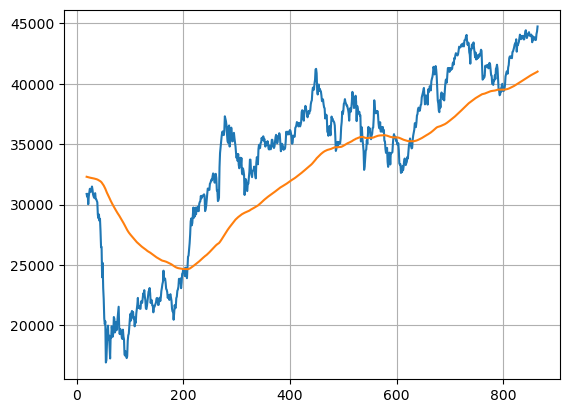

In [12]:
df_stock = df_stock.dropna(how="any")
plt.plot(df_stock["Price"])
plt.plot(df_stock["ema250"])
plt.grid()

In [13]:
df_stock.dropna(how='any', inplace = True)
df_stock.head()

,Price,ema5,ema10,ema15,ema25,ema100,ema150,ema250,diff5_10,signal5_10,...,signal25_100,diff250_150,signal250_150,sma,sma_shifted,signal,signal_sign,open,high,low
19,30876.640625,30924.202370,31106.661633,31276.868416,31530.425148,32111.827525,32211.637034,32298.855874,-182.459263,-188.790539,...,-442.588097,-87.218840,-63.226096,31089.218555,31878.359766,1001.719141,1.0,32016.981363,32123.364089,31786.570427
20,30647.044922,30831.816554,31023.094958,31198.140479,31462.472822,32082.821929,32190.913960,32285.694034,-191.278404,-189.288112,...,-478.140298,-94.780074,-69.536891,30968.570117,31819.365430,1172.320508,1.0,31948.047639,32078.418634,31755.057344
21,30833.242188,30832.291765,30988.576272,31152.528193,31414.070466,32058.077775,32172.931552,32274.120713,-156.284507,-182.687391,...,-511.313701,-101.189160,-75.867345,30892.866016,31771.506055,938.263867,1.0,31822.459567,31976.672912,31651.749729
22,30022.900391,30562.494640,30812.998839,31011.324718,31307.057383,32017.777233,32144.454318,32256.182702,-250.504199,-196.250753,...,-551.194930,-111.728384,-83.039553,30787.127148,31755.856250,1732.955859,1.0,31856.165741,31958.974637,31451.362565
23,30686.341797,30603.777026,30789.970286,30970.701853,31259.310030,31991.412175,32125.141570,32243.674010,-186.193260,-194.239254,...,-587.376373,-118.532440,-90.138130,30761.042187,31710.671875,1024.330078,1.0,31563.607117,31696.279100,31253.655466


In [14]:
df_stock.columns

Index(['Price', 'ema5', 'ema10', 'ema15', 'ema25', 'ema100', 'ema150',
       'ema250', 'diff5_10', 'signal5_10', 'diff5_15', 'signal5_15',
       'diff5_25', 'signal5_25', 'diff25_100', 'signal25_100', 'diff250_150',
       'signal250_150', 'sma', 'sma_shifted', 'signal', 'signal_sign', 'open',
       'high', 'low'],
      dtype='object')

In [15]:
from sklearn import svm
y = np.array(df_stock["signal_sign"])

In [16]:
df_stock['sma'] = df_stock["Price"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(-10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Price"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

In [17]:
X = df_stock.drop(['signal_sign', 'sma_shifted', 'signal', 'sma'], axis=1).values

In [18]:
X[0], y[0]

(array([30876.640625  , 30924.20236969, 31106.66163261, 31276.8684162 ,
        31530.42514752, 32111.82752478, 32211.63703426, 32298.85587445,
         -182.45926291,  -188.79053912,  -352.66604651,  -338.43983282,
         -606.22277783,  -545.99845996,  -581.40237726,  -442.5880965 ,
          -87.2188402 ,   -63.22609561, 32016.98136253, 32123.36408932,
        31786.57042716]),
 1.0)

In [19]:
n_test = int(len(X)*0.2)
X.shape, y.shape, type(X), type(y), len(X), n_test

((846, 21), (846,), numpy.ndarray, numpy.ndarray, 846, 169)

In [20]:
X_train = X[:-n_test]
X_test = X[:n_test]

y_train = y[:-n_test]
y_test = y[:n_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((677, 21), (169, 21), (677,), (169,))

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#SVM
#clf = svm.SVC(C = 0.52, gamma='auto') # Gaussian Kernel
#clf.fit(X_train, y_train)

# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Random Forest

#clf = RandomForestClassifier().fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

/home/vivek/anaconda3/envs/envpytorch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print(clf)

LogisticRegression(random_state=0)


In [24]:
print("Accuracy(Train):",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy(Test):",metrics.accuracy_score(y_test, y_pred_test))

Accuracy(Train): 0.9689807976366323
Accuracy(Test): 0.9467455621301775


In [25]:
y_pred_test

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [26]:
len(PriceSeries1)
list_test_closing_price = PriceSeries1[:n_test]

In [30]:
list_PnL = []
for t in range(len(list_test_closing_price)-1):
    #print(t)
    PnL = -1*(list_test_closing_price[t+1] - list_test_closing_price[t])
    if y_pred_test[t] == 1:
        list_PnL.append(PnL)
    else:
        list_PnL.append(-1*PnL)

In [31]:
sum(list_PnL)

7256.455078125